<a href="https://colab.research.google.com/github/Dur-e-yashfeen/The-Impostor-Hunt-in-Texts/blob/main/Real_Or_Fake%F0%9F%A4%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

fake_or_real_the_impostor_hunt_path = kagglehub.competition_download('fake-or-real-the-impostor-hunt')

print('Data source import complete.')


In [ ]:
# Import necessary libraries
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Default style settings for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

def read_texts_from_dir(dir_path):
    """Reads text files from the specified directory and loads them into a DataFrame."""
    data = []
    if not os.path.isdir(dir_path):
        print(f"Warning: Directory not found: {dir_path}")
        return pd.DataFrame()

    for folder_name in sorted(os.listdir(dir_path)):
        folder_path = os.path.join(dir_path, folder_name)
        if os.path.isdir(folder_path):
            try:
                with open(os.path.join(folder_path, "file_1.txt"), "r", encoding="utf-8") as f1:
                    t1 = f1.read().strip()
                with open(os.path.join(folder_path, "file_2.txt"), "r", encoding="utf-8") as f2:
                    t2 = f2.read().strip()

                m = re.findall(r'(\d+)$', folder_name)
                idx = int(m[0]) if m else len(data)
                data.append((idx, t1, t2))
            except Exception as e:
                print(f"Error reading folder {folder_name}: {e}")

    df = pd.DataFrame(data, columns=["id", "file_1", "file_2"]).set_index("id").sort_index()
    return df

# Kaggle file paths
TRAIN_DIR = "/kaggle/input/fake-or-real-the-impostor-hunt/data/train"
TEST_DIR  = "/kaggle/input/fake-or-real-the-impostor-hunt/data/test"
TRAIN_CSV = "/kaggle/input/fake-or-real-the-impostor-hunt/data/train.csv"

# Load the datasets
df_train = read_texts_from_dir(TRAIN_DIR)
df_test  = read_texts_from_dir(TEST_DIR)
df_train_gt = pd.read_csv(TRAIN_CSV).set_index("id").sort_index()

print(f"Training set consists of {df_train.shape[0]} pairs.")
print(f"Test set consists of {df_test.shape[0]} pairs.")

# Display the first few rows of the loaded data
print("\n--- Training Data (Texts) ---")
display(df_train.head())

print("\n--- Training Data (Labels) ---")
display(df_train_gt.head())

Training set consists of 95 pairs.
Test set consists of 1068 pairs.

--- Training Data (Texts) ---


,file_1,file_2
id,,
0,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...
1,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...
2,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...
3,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...
4,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...



--- Training Data (Labels) ---


,real_text_id
id,
0,1
1,2
2,1
3,2
4,2



--- DataFrame created for Analysis ---


,id,label,char_length,word_count
0,0,Real,2196,304
1,0,Fake,2018,296
2,1,Fake,3124,454
3,1,Real,936,137
4,2,Real,1139,159


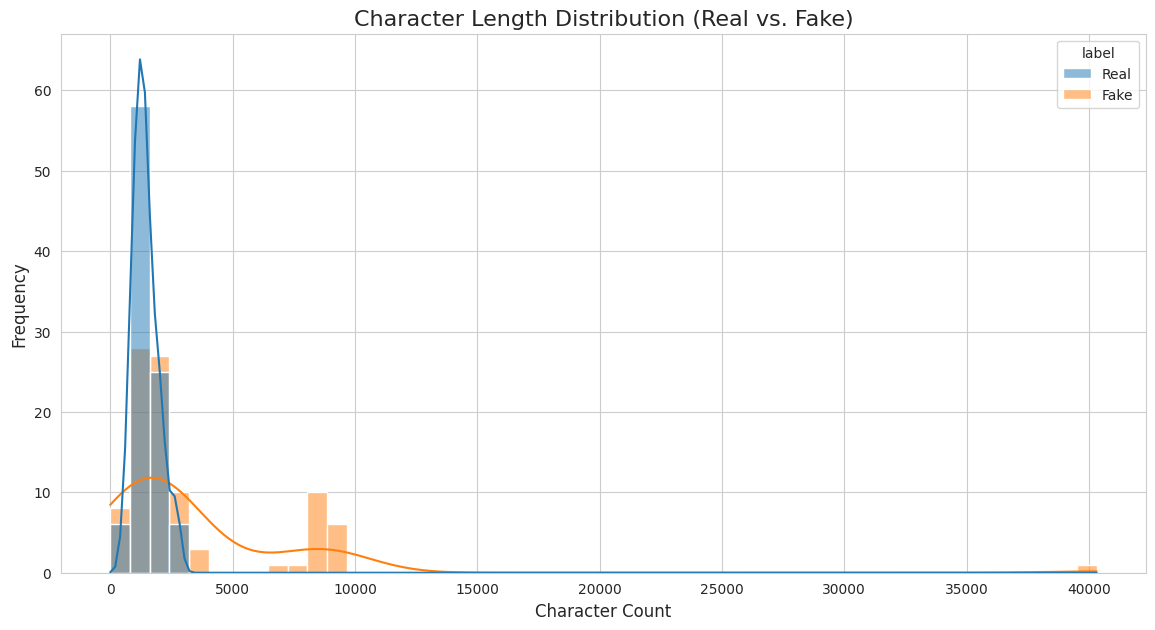

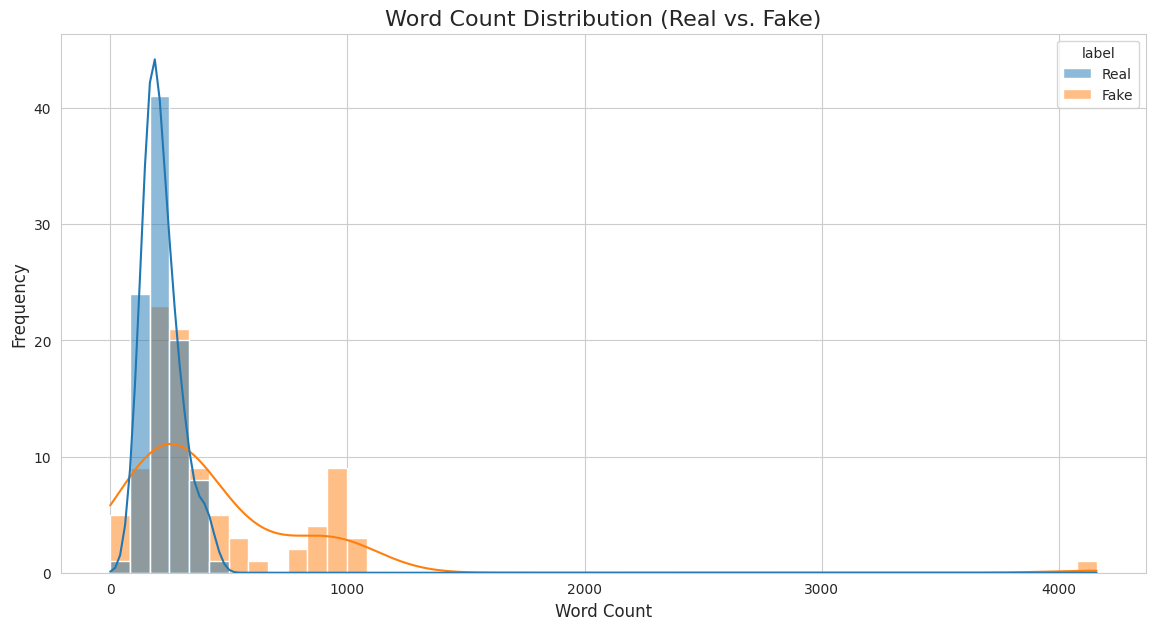


--- Statistical Summary of Text Lengths ---


char_length                                                           \
            count         mean          std    min     25%     50%     75%   
label                                                                        
Fake         95.0  3420.642105  4747.082324    0.0  1386.5  1852.0  3066.5   
Real         95.0  1446.178947   500.299888  550.0  1081.0  1373.0  1691.0   

               word_count                                                     \
           max      count        mean         std   min    25%    50%    75%   
label                                                                          
Fake   40316.0       95.0  428.052632  480.144844   0.0  210.5  286.0  476.0   
Real    2734.0       95.0  216.126316   77.227523  75.0  161.0  200.0  256.5   

               
          max  
label          
Fake   4158.0  
Real    446.0

In [ ]:
# === Step 2: Analyze and Visualize Text Lengths ===

# Let's create a more convenient DataFrame for analysis.
# Each row will represent a single text and include a 'Real'/'Fake' label.
analysis_data = []
for idx, row in df_train.iterrows():
    real_text_id = df_train_gt.loc[idx, 'real_text_id']

    # Add information for file_1
    text1 = row['file_1']
    analysis_data.append({
        'id': idx,
        'label': 'Real' if real_text_id == 1 else 'Fake',
        'char_length': len(text1),
        'word_count': len(text1.split())
    })

    # Add information for file_2
    text2 = row['file_2']
    analysis_data.append({
        'id': idx,
        'label': 'Real' if real_text_id == 2 else 'Fake',
        'char_length': len(text2),
        'word_count': len(text2.split())
    })

df_analysis = pd.DataFrame(analysis_data)

print("\n--- DataFrame created for Analysis ---")
display(df_analysis.head())


# Visualize Character Length Distribution
plt.figure(figsize=(14, 7))
sns.histplot(data=df_analysis, x='char_length', hue='label', kde=True, bins=50)
plt.title('Character Length Distribution (Real vs. Fake)', fontsize=16)
plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize Word Count Distribution
plt.figure(figsize=(14, 7))
sns.histplot(data=df_analysis, x='word_count', hue='label', kde=True, bins=50)
plt.title('Word Count Distribution (Real vs. Fake)', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Show Statistical Summary
print("\n--- Statistical Summary of Text Lengths ---")
display(df_analysis.groupby('label')[['char_length', 'word_count']].describe())


--- DataFrame with New Features ---


,label,punctuation_ratio,uppercase_ratio
0,Real,0.014572,0.040838
1,Fake,0.016353,0.015986
2,Fake,0.015045,0.008387
3,Real,0.024573,0.014455
4,Real,0.014047,0.004154


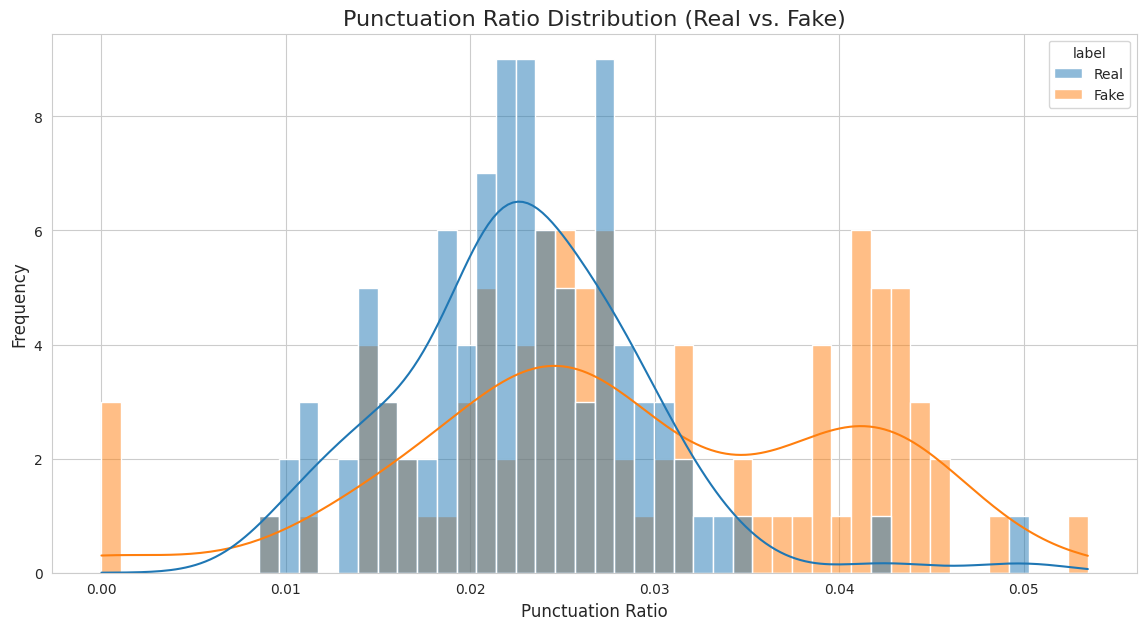

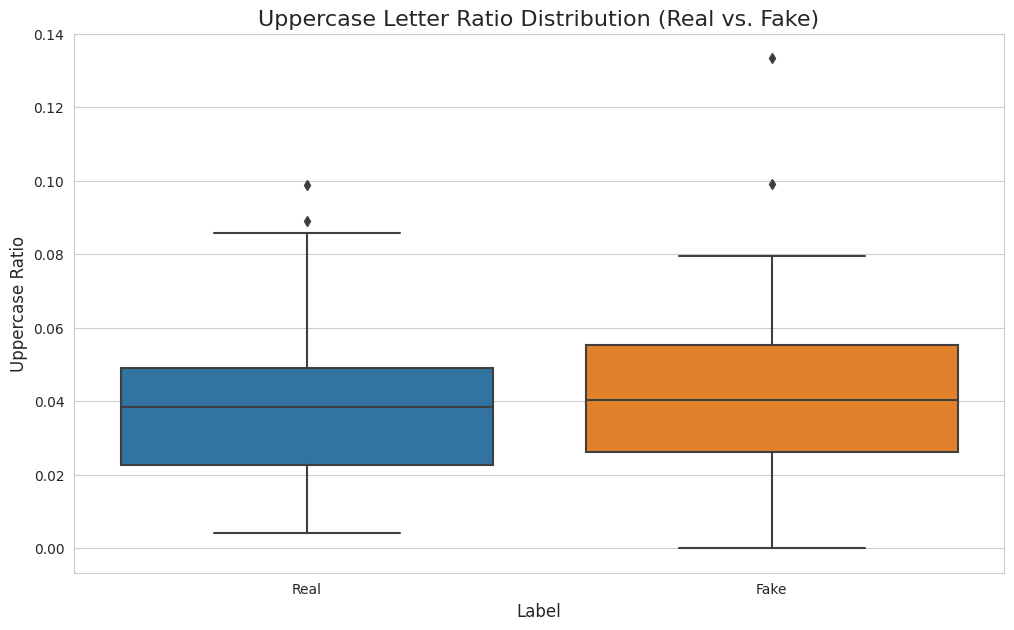


--- Statistical Summary of New Features ---


punctuation_ratio                                                    \
                  count      mean       std       min       25%       50%   
label                                                                       
Fake               95.0  0.028780  0.011357  0.000000  0.021823  0.026846   
Real               95.0  0.022766  0.006682  0.009096  0.019090  0.022578   

                          uppercase_ratio                                \
            75%       max           count      mean       std       min   
label                                                                     
Fake   0.039707  0.053478            95.0  0.040712  0.021201  0.000000   
Real   0.026979  0.049864            95.0  0.039056  0.020959  0.004154   

                                               
            25%       50%       75%       max  
label                                          
Fake   0.026132  0.040264  0.055257  0.133333  
Real   0.022623  0.038390  0.049063  0.098824

In [ ]:
# === Step 3: Analyze Punctuation and Uppercase Usage ===
# This script assumes that 'df_train' and 'df_train_gt' DataFrames
# from Step 1 are already loaded in your environment.

import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Default style settings for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# --- Re-create a DataFrame with text for detailed analysis ---
# This time, we include the raw text in the DataFrame to perform more feature engineering.
analysis_data_detailed = []
for idx, row in df_train.iterrows():
    real_text_id = df_train_gt.loc[idx, 'real_text_id']

    # Add information for file_1
    text1 = row['file_1']
    analysis_data_detailed.append({
        'id': idx,
        'label': 'Real' if real_text_id == 1 else 'Fake',
        'text': text1,
        'char_length': len(text1)
    })

    # Add information for file_2
    text2 = row['file_2']
    analysis_data_detailed.append({
        'id': idx,
        'label': 'Real' if real_text_id == 2 else 'Fake',
        'text': text2,
        'char_length': len(text2)
    })

df_analysis = pd.DataFrame(analysis_data_detailed)


# --- Feature Engineering: Punctuation and Uppercase ---

# Function to calculate the ratio of punctuation characters
def get_punctuation_ratio(text):
    if not text:
        return 0
    punctuation_count = sum([1 for char in text if char in string.punctuation])
    return punctuation_count / len(text)

# Function to calculate the ratio of uppercase letters
def get_uppercase_ratio(text):
    if not text:
        return 0
    # Consider only alphabetic characters for the ratio
    alpha_chars = [char for char in text if char.isalpha()]
    if not alpha_chars:
        return 0
    uppercase_count = sum([1 for char in alpha_chars if char.isupper()])
    return uppercase_count / len(alpha_chars)

# Apply the functions to create new feature columns
df_analysis['punctuation_ratio'] = df_analysis['text'].apply(get_punctuation_ratio)
df_analysis['uppercase_ratio'] = df_analysis['text'].apply(get_uppercase_ratio)

print("\n--- DataFrame with New Features ---")
display(df_analysis[['label', 'punctuation_ratio', 'uppercase_ratio']].head())


# --- Visualize New Features ---

# Visualize Punctuation Ratio Distribution
plt.figure(figsize=(14, 7))
sns.histplot(data=df_analysis, x='punctuation_ratio', hue='label', kde=True, bins=50)
plt.title('Punctuation Ratio Distribution (Real vs. Fake)', fontsize=16)
plt.xlabel('Punctuation Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize Uppercase Ratio Distribution using a boxplot for a different view
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_analysis, x='label', y='uppercase_ratio')
plt.title('Uppercase Letter Ratio Distribution (Real vs. Fake)', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Uppercase Ratio', fontsize=12)
plt.show()

# --- Statistical Summary ---
print("\n--- Statistical Summary of New Features ---")
display(df_analysis.groupby('label')[['punctuation_ratio', 'uppercase_ratio']].describe())


--- DataFrame with New Features ---


,label,digit_ratio,vocabulary_richness
0,Real,0.000000,0.806780
1,Fake,0.000000,0.787671
2,Fake,0.000374,0.667391
3,Real,0.018750,0.827338
4,Real,0.000000,0.810127


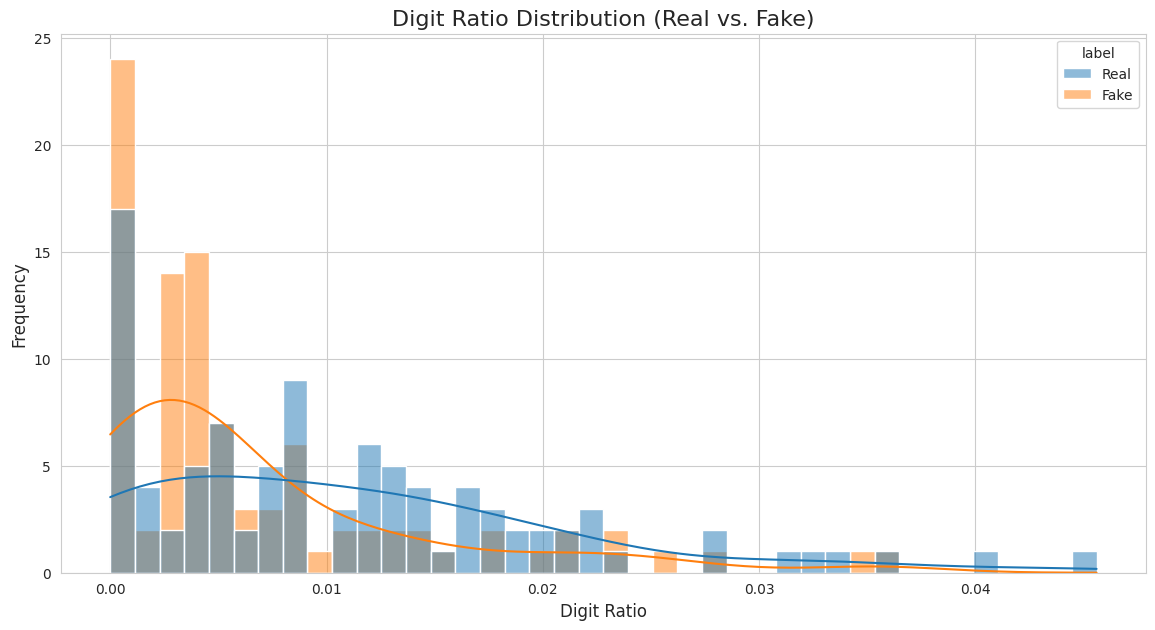

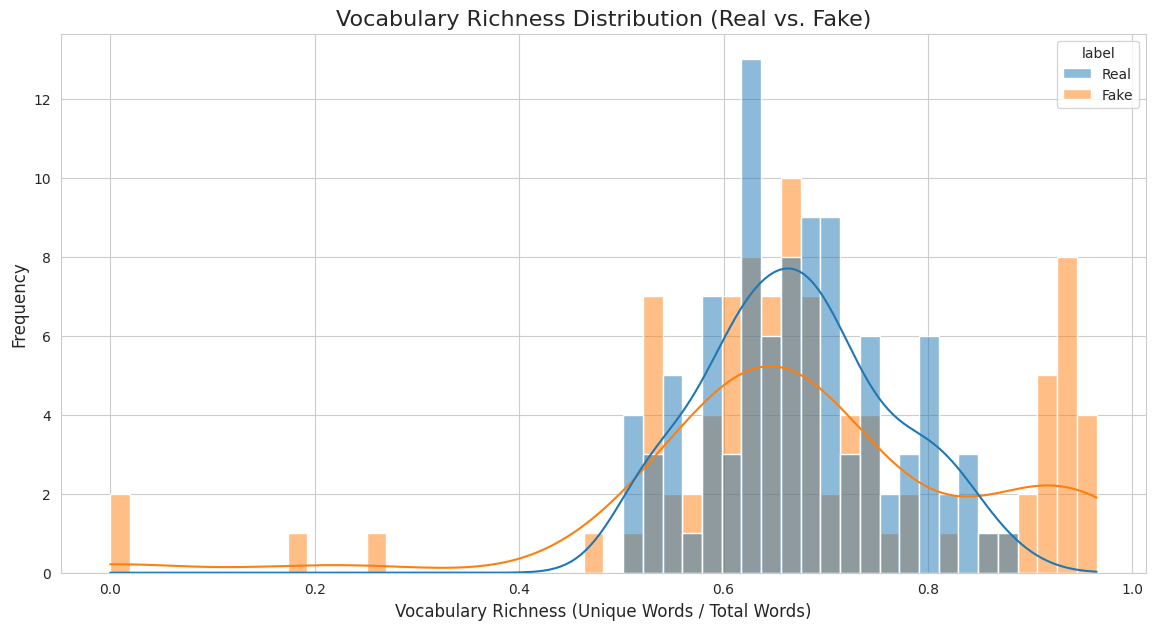


--- Statistical Summary of New Features ---


digit_ratio                                                         \
            count      mean       std  min       25%       50%       75%   
label                                                                      
Fake         95.0  0.006572  0.007813  0.0  0.000762  0.003814  0.008418   
Real         95.0  0.010983  0.009916  0.0  0.003704  0.008664  0.016178   

                vocabulary_richness                                          \
            max               count      mean       std       min       25%   
label                                                                         
Fake   0.035905                95.0  0.682931  0.181973  0.000000  0.607024   
Real   0.045605                95.0  0.673224  0.089866  0.509132  0.619110   

                                     
            50%       75%       max  
label                                
Fake   0.670455  0.769324  0.964987  
Real   0.670103  0.732810  0.885714

In [ ]:
# === Step 4: Analyze Digit Usage and Vocabulary Richness ===
# This script assumes that 'df_train' and 'df_train_gt' DataFrames
# from Step 1 are already loaded in your environment.

import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Default style settings for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# --- Re-create a DataFrame with text for detailed analysis ---
# We use the same structure as in the previous step for consistency.
analysis_data_detailed = []
for idx, row in df_train.iterrows():
    real_text_id = df_train_gt.loc[idx, 'real_text_id']

    # Add information for file_1
    text1 = row['file_1']
    analysis_data_detailed.append({
        'id': idx,
        'label': 'Real' if real_text_id == 1 else 'Fake',
        'text': text1
    })

    # Add information for file_2
    text2 = row['file_2']
    analysis_data_detailed.append({
        'id': idx,
        'label': 'Real' if real_text_id == 2 else 'Fake',
        'text': text2
    })

df_analysis = pd.DataFrame(analysis_data_detailed)


# --- Feature Engineering: Digit Ratio and Vocabulary Richness ---

# Function to calculate the ratio of digit characters
def get_digit_ratio(text):
    if not text:
        return 0
    # Count non-whitespace characters for a more stable denominator
    non_whitespace_chars = [char for char in text if not char.isspace()]
    if not non_whitespace_chars:
        return 0
    digit_count = sum([1 for char in text if char.isdigit()])
    return digit_count / len(non_whitespace_chars)

# Function to calculate vocabulary richness
def get_vocabulary_richness(text):
    if not text:
        return 0
    # Find all words, convert to lower case for consistency
    words = re.findall(r'\b\w+\b', text.lower())
    if not words:
        return 0
    unique_words = set(words)
    return len(unique_words) / len(words)

# Apply the functions to create new feature columns
df_analysis['digit_ratio'] = df_analysis['text'].apply(get_digit_ratio)
df_analysis['vocabulary_richness'] = df_analysis['text'].apply(get_vocabulary_richness)

print("\n--- DataFrame with New Features ---")
display(df_analysis[['label', 'digit_ratio', 'vocabulary_richness']].head())


# --- Visualize New Features ---

# Visualize Digit Ratio Distribution
plt.figure(figsize=(14, 7))
sns.histplot(data=df_analysis, x='digit_ratio', hue='label', kde=True, bins=40)
plt.title('Digit Ratio Distribution (Real vs. Fake)', fontsize=16)
plt.xlabel('Digit Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize Vocabulary Richness Distribution
plt.figure(figsize=(14, 7))
sns.histplot(data=df_analysis, x='vocabulary_richness', hue='label', kde=True, bins=50)
plt.title('Vocabulary Richness Distribution (Real vs. Fake)', fontsize=16)
plt.xlabel('Vocabulary Richness (Unique Words / Total Words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# --- Statistical Summary ---
print("\n--- Statistical Summary of New Features ---")
display(df_analysis.groupby('label')[['digit_ratio', 'vocabulary_richness']].describe())


--- Full Feature Set ---


,label_numeric,char_length,word_count,punctuation_ratio,uppercase_ratio,digit_ratio,vocabulary_richness
0,1,2196,304,0.014572,0.040838,0.000000,0.806780
1,0,2018,296,0.016353,0.015986,0.000000,0.787671
2,0,3124,454,0.015045,0.008387,0.000374,0.667391
3,1,936,137,0.024573,0.014455,0.018750,0.827338
4,1,1139,159,0.014047,0.004154,0.000000,0.810127


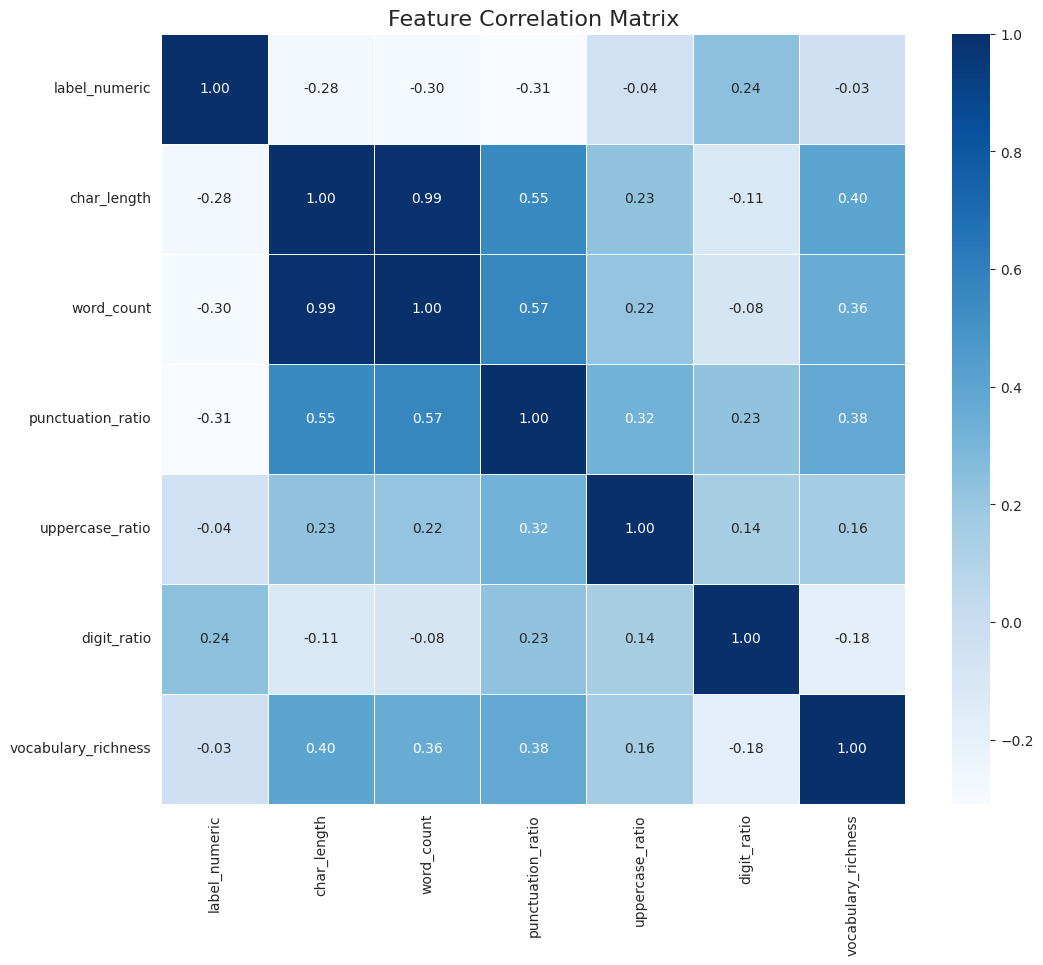


--- Correlation with Target Variable (label_numeric) ---


punctuation_ratio      0.308623
word_count             0.295905
char_length            0.282098
digit_ratio            0.241066
uppercase_ratio        0.039444
vocabulary_richness    0.033983
Name: label_numeric, dtype: float64

In [ ]:
# === Step 5: Consolidate Features and Analyze Correlations ===
# This script assumes that 'df_train' and 'df_train_gt' DataFrames
# from Step 1 are already loaded in your environment.

import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Default style settings for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# --- Re-create a DataFrame with text for detailed analysis ---
analysis_data_detailed = []
for idx, row in df_train.iterrows():
    real_text_id = df_train_gt.loc[idx, 'real_text_id']

    # Add information for file_1
    text1 = row['file_1']
    analysis_data_detailed.append({
        'id': idx,
        'label': 'Real' if real_text_id == 1 else 'Fake',
        'text': text1
    })

    # Add information for file_2
    text2 = row['file_2']
    analysis_data_detailed.append({
        'id': idx,
        'label': 'Real' if real_text_id == 2 else 'Fake',
        'text': text2
    })

df_analysis = pd.DataFrame(analysis_data_detailed)

# --- Define All Feature Engineering Functions from Previous Steps ---

def get_char_length(text):
    return len(text)

def get_word_count(text):
    return len(text.split())

def get_punctuation_ratio(text):
    if not text: return 0
    punctuation_count = sum([1 for char in text if char in string.punctuation])
    return punctuation_count / len(text) if len(text) > 0 else 0

def get_uppercase_ratio(text):
    if not text: return 0
    alpha_chars = [char for char in text if char.isalpha()]
    if not alpha_chars: return 0
    uppercase_count = sum([1 for char in alpha_chars if char.isupper()])
    return uppercase_count / len(alpha_chars)

def get_digit_ratio(text):
    if not text: return 0
    non_whitespace_chars = [char for char in text if not char.isspace()]
    if not non_whitespace_chars: return 0
    digit_count = sum([1 for char in text if char.isdigit()])
    return digit_count / len(non_whitespace_chars)

def get_vocabulary_richness(text):
    if not text: return 0
    words = re.findall(r'\b\w+\b', text.lower())
    if not words: return 0
    return len(set(words)) / len(words)

# --- Apply All Functions to Create the Full Feature Set ---
df_analysis['char_length'] = df_analysis['text'].apply(get_char_length)
df_analysis['word_count'] = df_analysis['text'].apply(get_word_count)
df_analysis['punctuation_ratio'] = df_analysis['text'].apply(get_punctuation_ratio)
df_analysis['uppercase_ratio'] = df_analysis['text'].apply(get_uppercase_ratio)
df_analysis['digit_ratio'] = df_analysis['text'].apply(get_digit_ratio)
df_analysis['vocabulary_richness'] = df_analysis['text'].apply(get_vocabulary_richness)

# Map 'label' to a numerical value for correlation calculation
df_analysis['label_numeric'] = df_analysis['label'].apply(lambda x: 1 if x == 'Real' else 0)

# Select only the feature columns for the correlation matrix
feature_columns = [
    'label_numeric', 'char_length', 'word_count',
    'punctuation_ratio', 'uppercase_ratio', 'digit_ratio', 'vocabulary_richness'
]
df_features = df_analysis[feature_columns]

print("\n--- Full Feature Set ---")
display(df_features.head())


# --- Calculate and Visualize the Correlation Matrix ---
correlation_matrix = df_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# --- Display Correlations with the Target Variable ---
print("\n--- Correlation with Target Variable (label_numeric) ---")
# Sort by the absolute value to see the strongest relationships
correlation_with_target = correlation_matrix['label_numeric'].drop('label_numeric')
display(correlation_with_target.abs().sort_values(ascending=False))

--- Data Split ---
Training set shape: (152, 6)
Testing set shape: (38, 6)

Model Accuracy: 0.7895

--- Classification Report ---
              precision    recall  f1-score   support

        Fake       0.79      0.79      0.79        19
        Real       0.79      0.79      0.79        19

    accuracy                           0.79        38
   macro avg       0.79      0.79      0.79        38
weighted avg       0.79      0.79      0.79        38


--- Confusion Matrix ---


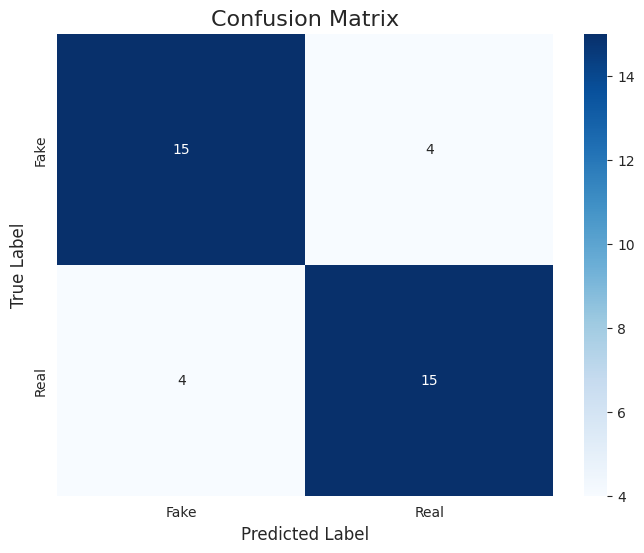

In [ ]:
# === Step 6: Baseline Model Training and Evaluation ===
# This script uses the features engineered in the previous steps to train a
# simple classification model and evaluate its performance.
# It assumes 'df_train' and 'df_train_gt' are loaded from Step 1.

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Default style settings for visualizations
sns.set_style('whitegrid')

# --- Re-create the full feature DataFrame from Step 5 ---
analysis_data_detailed = []
for idx, row in df_train.iterrows():
    real_text_id = df_train_gt.loc[idx, 'real_text_id']
    analysis_data_detailed.append({'id': idx, 'label': 'Real' if real_text_id == 1 else 'Fake', 'text': row['file_1']})
    analysis_data_detailed.append({'id': idx, 'label': 'Real' if real_text_id == 2 else 'Fake', 'text': row['file_2']})
df_analysis = pd.DataFrame(analysis_data_detailed)

# --- Feature Engineering Functions ---
def get_char_length(text): return len(text)
def get_word_count(text): return len(text.split())
def get_punctuation_ratio(text):
    if not text: return 0
    p_count = sum([1 for char in text if char in string.punctuation])
    return p_count / len(text) if len(text) > 0 else 0
def get_uppercase_ratio(text):
    if not text: return 0
    a_chars = [char for char in text if char.isalpha()]
    if not a_chars: return 0
    u_count = sum([1 for char in a_chars if char.isupper()])
    return u_count / len(a_chars)
def get_digit_ratio(text):
    if not text: return 0
    non_ws_chars = [char for char in text if not char.isspace()]
    if not non_ws_chars: return 0
    d_count = sum([1 for char in text if char.isdigit()])
    return d_count / len(non_ws_chars)
def get_vocabulary_richness(text):
    if not text: return 0
    words = re.findall(r'\b\w+\b', text.lower())
    if not words: return 0
    return len(set(words)) / len(words)

# Apply all functions
df_analysis['char_length'] = df_analysis['text'].apply(get_char_length)
df_analysis['word_count'] = df_analysis['text'].apply(get_word_count)
df_analysis['punctuation_ratio'] = df_analysis['text'].apply(get_punctuation_ratio)
df_analysis['uppercase_ratio'] = df_analysis['text'].apply(get_uppercase_ratio)
df_analysis['digit_ratio'] = df_analysis['text'].apply(get_digit_ratio)
df_analysis['vocabulary_richness'] = df_analysis['text'].apply(get_vocabulary_richness)
df_analysis['label_numeric'] = df_analysis['label'].apply(lambda x: 1 if x == 'Real' else 0)

# --- Prepare Data for Modeling ---
# Define features (X) and target (y)
feature_columns = ['char_length', 'word_count', 'punctuation_ratio', 'uppercase_ratio', 'digit_ratio', 'vocabulary_richness']
X = df_analysis[feature_columns]
y = df_analysis['label_numeric']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
# It's important to scale data for models like Logistic Regression.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Data Split ---")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

# --- Train a Logistic Regression Model ---
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# --- Evaluate the Model ---
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Print the classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

# Visualize the confusion matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

--- Combined Data Shape ---
Combined training set shape: (152, 5006)
Combined testing set shape: (38, 5006)

Combined Model Accuracy: 0.8158

--- Combined Model Classification Report ---
              precision    recall  f1-score   support

        Fake       0.83      0.79      0.81        19
        Real       0.80      0.84      0.82        19

    accuracy                           0.82        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.82      0.82      0.82        38


--- Combined Model Confusion Matrix ---


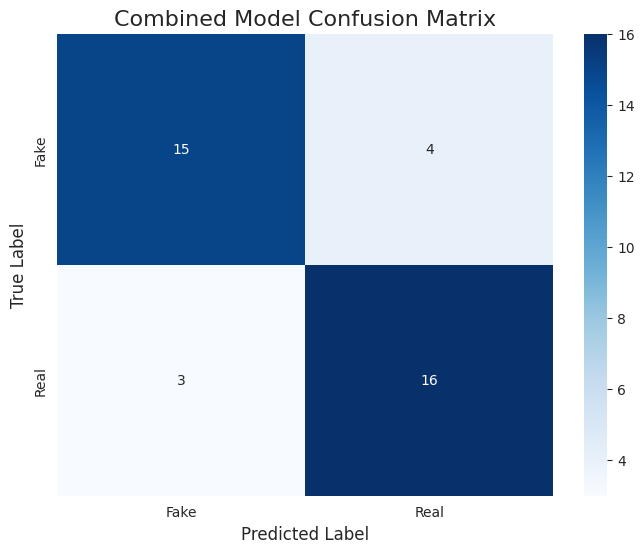

In [ ]:
# === Step 7: Integrating Text Content with TF-IDF ===
# This script combines our previously engineered stylistic features with
# TF-IDF features from the text content to build a more powerful model.
# It assumes 'df_train' and 'df_train_gt' are loaded from Step 1.

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack

# Default style settings for visualizations
sns.set_style('whitegrid')

# --- Re-create the full feature DataFrame from Step 5 ---
analysis_data_detailed = []
for idx, row in df_train.iterrows():
    real_text_id = df_train_gt.loc[idx, 'real_text_id']
    analysis_data_detailed.append({'id': idx, 'label': 'Real' if real_text_id == 1 else 'Fake', 'text': row['file_1']})
    analysis_data_detailed.append({'id': idx, 'label': 'Real' if real_text_id == 2 else 'Fake', 'text': row['file_2']})
df_analysis = pd.DataFrame(analysis_data_detailed)

# --- Feature Engineering Functions ---
def get_char_length(text): return len(text)
def get_word_count(text): return len(text.split())
def get_punctuation_ratio(text):
    if not text: return 0
    p_count = sum([1 for char in text if char in string.punctuation])
    return p_count / len(text) if len(text) > 0 else 0
def get_uppercase_ratio(text):
    if not text: return 0
    a_chars = [char for char in text if char.isalpha()]
    if not a_chars: return 0
    u_count = sum([1 for char in a_chars if char.isupper()])
    return u_count / len(a_chars)
def get_digit_ratio(text):
    if not text: return 0
    non_ws_chars = [char for char in text if not char.isspace()]
    if not non_ws_chars: return 0
    d_count = sum([1 for char in text if char.isdigit()])
    return d_count / len(non_ws_chars)
def get_vocabulary_richness(text):
    if not text: return 0
    words = re.findall(r'\b\w+\b', text.lower())
    if not words: return 0
    return len(set(words)) / len(words)

# Apply all functions to create stylistic features
df_analysis['char_length'] = df_analysis['text'].apply(get_char_length)
df_analysis['word_count'] = df_analysis['text'].apply(get_word_count)
df_analysis['punctuation_ratio'] = df_analysis['text'].apply(get_punctuation_ratio)
df_analysis['uppercase_ratio'] = df_analysis['text'].apply(get_uppercase_ratio)
df_analysis['digit_ratio'] = df_analysis['text'].apply(get_digit_ratio)
df_analysis['vocabulary_richness'] = df_analysis['text'].apply(get_vocabulary_richness)
df_analysis['label_numeric'] = df_analysis['label'].apply(lambda x: 1 if x == 'Real' else 0)


# --- Prepare Data for Combined Model ---
# Define features (X) and target (y)
feature_columns = ['char_length', 'word_count', 'punctuation_ratio', 'uppercase_ratio', 'digit_ratio', 'vocabulary_richness']
X_numerical = df_analysis[feature_columns]
X_text = df_analysis['text']
y = df_analysis['label_numeric']

# Split data *before* vectorization to prevent data leakage
X_num_train, X_num_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_numerical, X_text, y, test_size=0.2, random_state=42, stratify=y
)

# --- Scale Numerical Features ---
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_test_scaled = scaler.transform(X_num_test)

# --- Vectorize Text Features using TF-IDF ---
# We limit the number of features to 5000 for efficiency
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text_train_tfidf = vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = vectorizer.transform(X_text_test)

# --- Combine Numerical and Text Features ---
# Use hstack to combine the dense numerical matrix with the sparse text matrix
X_train_combined = hstack([X_num_train_scaled, X_text_train_tfidf])
X_test_combined = hstack([X_num_test_scaled, X_text_test_tfidf])

print("--- Combined Data Shape ---")
print(f"Combined training set shape: {X_train_combined.shape}")
print(f"Combined testing set shape: {X_test_combined.shape}")

# --- Train and Evaluate the Combined Model ---
model_combined = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence
model_combined.fit(X_train_combined, y_train)

# Make predictions
y_pred_combined = model_combined.predict(X_test_combined)

# Evaluate
accuracy_combined = accuracy_score(y_test, y_pred_combined)
print(f"\nCombined Model Accuracy: {accuracy_combined:.4f}")

print("\n--- Combined Model Classification Report ---")
print(classification_report(y_test, y_pred_combined, target_names=['Fake', 'Real']))

print("\n--- Combined Model Confusion Matrix ---")
cm_combined = confusion_matrix(y_test, y_pred_combined)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Combined Model Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [ ]:
# === Step 8: Hyperparameter Tuning with CatBoost and N-Grams ===
# This script switches the model to CatBoost, another powerful gradient boosting library,
# and optimizes its hyperparameters using RandomizedSearchCV on the n-gram feature set.

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier # Import CatBoostClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack

# Default style settings for visualizations
sns.set_style('whitegrid')

# --- Re-create the full feature DataFrame from Step 5 ---
# Note: Assuming df_train and df_train_gt are pre-loaded from Step 1
analysis_data_detailed = []
for idx, row in df_train.iterrows():
    real_text_id = df_train_gt.loc[idx, 'real_text_id']
    analysis_data_detailed.append({'id': idx, 'label': 'Real' if real_text_id == 1 else 'Fake', 'text': row['file_1']})
    analysis_data_detailed.append({'id': idx, 'label': 'Real' if real_text_id == 2 else 'Fake', 'text': row['file_2']})
df_analysis = pd.DataFrame(analysis_data_detailed)

# --- Feature Engineering Functions ---
def get_char_length(text): return len(text)
def get_word_count(text): return len(text.split())
def get_punctuation_ratio(text):
    if not text: return 0
    p_count = sum([1 for char in text if char in string.punctuation])
    return p_count / len(text) if len(text) > 0 else 0
def get_uppercase_ratio(text):
    if not text: return 0
    a_chars = [char for char in text if char.isalpha()]
    if not a_chars: return 0
    u_count = sum([1 for char in a_chars if char.isupper()])
    return u_count / len(a_chars)
def get_digit_ratio(text):
    if not text: return 0
    non_ws_chars = [char for char in text if not char.isspace()]
    if not non_ws_chars: return 0
    d_count = sum([1 for char in text if char.isdigit()])
    return d_count / len(non_ws_chars)
def get_vocabulary_richness(text):
    if not text: return 0
    words = re.findall(r'\b\w+\b', text.lower())
    if not words: return 0
    return len(set(words)) / len(words)

# Apply all functions to create stylistic features
df_analysis['char_length'] = df_analysis['text'].apply(get_char_length)
df_analysis['word_count'] = df_analysis['text'].apply(get_word_count)
df_analysis['punctuation_ratio'] = df_analysis['text'].apply(get_punctuation_ratio)
df_analysis['uppercase_ratio'] = df_analysis['text'].apply(get_uppercase_ratio)
df_analysis['digit_ratio'] = df_analysis['text'].apply(get_digit_ratio)
df_analysis['vocabulary_richness'] = df_analysis['text'].apply(get_vocabulary_richness)
df_analysis['label_numeric'] = df_analysis['label'].apply(lambda x: 1 if x == 'Real' else 0)

# --- Prepare Data for Combined Model ---
feature_columns = ['char_length', 'word_count', 'punctuation_ratio', 'uppercase_ratio', 'digit_ratio', 'vocabulary_richness']
X_numerical = df_analysis[feature_columns]
X_text = df_analysis['text']
y = df_analysis['label_numeric']

# Split data
X_num_train, X_num_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_numerical, X_text, y, test_size=0.2, random_state=42, stratify=y
)

# --- Vectorize Text Features using TF-IDF with N-Grams ---
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_text_train_tfidf = vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = vectorizer.transform(X_text_test)

# --- Combine Numerical (Unscaled) and Text Features ---
X_train_combined = hstack([X_num_train.values, X_text_train_tfidf])
X_test_combined = hstack([X_num_test.values, X_text_test_tfidf])

# --- Hyperparameter Tuning with CatBoost ---
print("--- Starting Hyperparameter Tuning with CatBoost ---")
catboost_model = CatBoostClassifier(random_state=42, silent=True, thread_count=-1)

# Define a distribution of parameters for CatBoost
param_dist = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

# Set up RandomizedSearchCV for CatBoost
random_search = RandomizedSearchCV(estimator=catboost_model,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=2,
                                   scoring='accuracy',
                                   random_state=42)

# Fit the random search to the data
random_search.fit(X_train_combined, y_train)

--- Starting Hyperparameter Tuning with CatBoost ---
Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f453149b750>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'border_count': [32, 64, 128],
                                        'depth': [4, 6, 8],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 3, 5, 7],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, scoring='accuracy', verbose=2)


--- Best Parameters Found for CatBoost ---
{'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 4, 'border_count': 64}

Optimized CatBoost Model Accuracy with N-Grams: 0.8684

--- Optimized CatBoost Model Classification Report ---
              precision    recall  f1-score   support

        Fake       0.94      0.79      0.86        19
        Real       0.82      0.95      0.88        19

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38


--- Optimized CatBoost Model Confusion Matrix ---


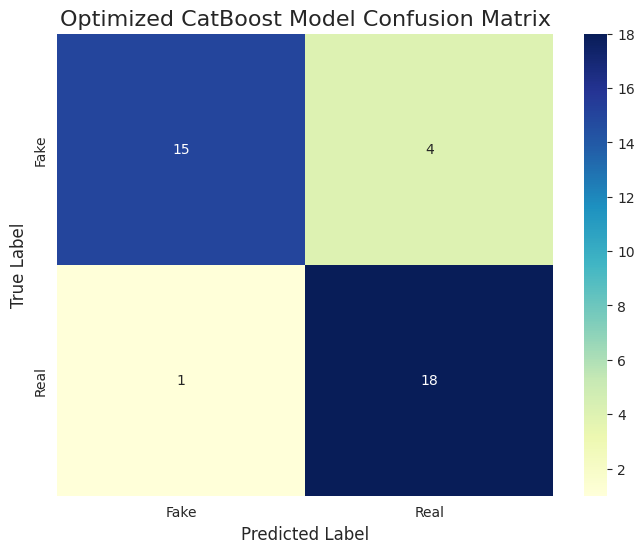

In [ ]:
# Print the best parameters found
print("\n--- Best Parameters Found for CatBoost ---")
print(random_search.best_params_)

# --- Evaluate the Best Model Found by Random Search ---
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test_combined)

# Evaluate
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nOptimized CatBoost Model Accuracy with N-Grams: {accuracy_best:.4f}")

print("\n--- Optimized CatBoost Model Classification Report ---")
print(classification_report(y_test, y_pred_best, target_names=['Fake', 'Real']))

print("\n--- Optimized CatBoost Model Confusion Matrix ---")
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Optimized CatBoost Model Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

--- Training CatBoost Model with Best Parameters ---
Model training complete.


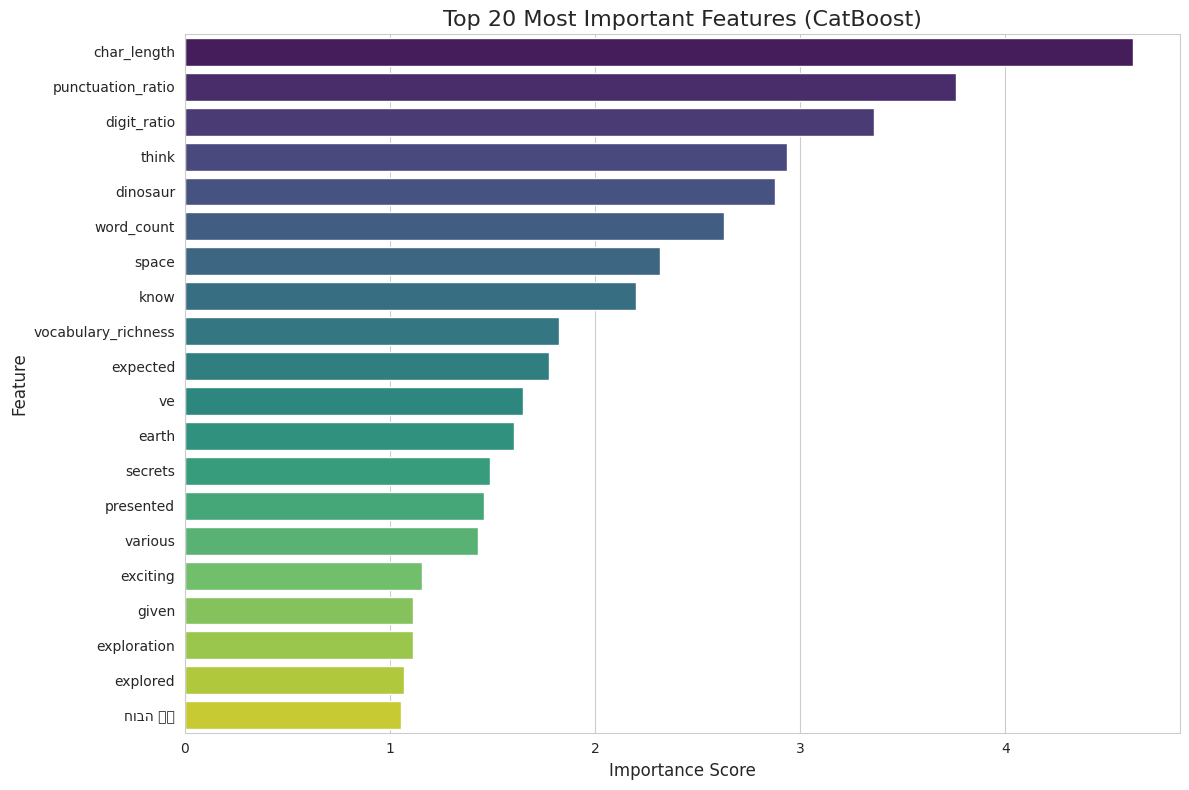


--- Top 10 Most Important Features ---
                  feature  importance
0             char_length    4.620647
2       punctuation_ratio    3.758315
4             digit_ratio    3.357366
4054                think    2.934981
1124             dinosaur    2.874697
1              word_count    2.627461
3719                space    2.314844
2168                 know    2.198099
5     vocabulary_richness    1.821599
1488             expected    1.776794


In [ ]:
# === Step 9: Feature Importance Analysis ===
# This script trains the best CatBoost model on the entire training dataset and then
# visualizes the features (both stylistic and TF-IDF words) that the model found most important.

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Default style settings for visualizations
sns.set_style('whitegrid')

# --- Re-create the full feature DataFrame from Step 5 ---
# Note: Assuming df_train and df_train_gt are pre-loaded from Step 1
analysis_data_detailed = []
for idx, row in df_train.iterrows():
    real_text_id = df_train_gt.loc[idx, 'real_text_id']
    analysis_data_detailed.append({'id': idx, 'label': 'Real' if real_text_id == 1 else 'Fake', 'text': row['file_1']})
    analysis_data_detailed.append({'id': idx, 'label': 'Real' if real_text_id == 2 else 'Fake', 'text': row['file_2']})
df_analysis = pd.DataFrame(analysis_data_detailed)

# --- Feature Engineering Functions ---
def get_char_length(text): return len(text)
def get_word_count(text): return len(text.split())
def get_punctuation_ratio(text):
    if not text: return 0
    p_count = sum([1 for char in text if char in string.punctuation])
    return p_count / len(text) if len(text) > 0 else 0
def get_uppercase_ratio(text):
    if not text: return 0
    a_chars = [char for char in text if char.isalpha()]
    if not a_chars: return 0
    u_count = sum([1 for char in a_chars if char.isupper()])
    return u_count / len(a_chars)
def get_digit_ratio(text):
    if not text: return 0
    non_ws_chars = [char for char in text if not char.isspace()]
    if not non_ws_chars: return 0
    d_count = sum([1 for char in text if char.isdigit()])
    return d_count / len(non_ws_chars)
def get_vocabulary_richness(text):
    if not text: return 0
    words = re.findall(r'\b\w+\b', text.lower())
    if not words: return 0
    return len(set(words)) / len(words)

# Apply all functions to create stylistic features
df_analysis['char_length'] = df_analysis['text'].apply(get_char_length)
df_analysis['word_count'] = df_analysis['text'].apply(get_word_count)
df_analysis['punctuation_ratio'] = df_analysis['text'].apply(get_punctuation_ratio)
df_analysis['uppercase_ratio'] = df_analysis['text'].apply(get_uppercase_ratio)
df_analysis['digit_ratio'] = df_analysis['text'].apply(get_digit_ratio)
df_analysis['vocabulary_richness'] = df_analysis['text'].apply(get_vocabulary_richness)
df_analysis['label_numeric'] = df_analysis['label'].apply(lambda x: 1 if x == 'Real' else 0)

# --- Data Preparation ---
feature_columns = ['char_length', 'word_count', 'punctuation_ratio', 'uppercase_ratio', 'digit_ratio', 'vocabulary_richness']
X_numerical = df_analysis[feature_columns]
X_text = df_analysis['text']
y = df_analysis['label_numeric']

# --- Vectorize Text Features using TF-IDF with N-Grams ---
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_text_tfidf = vectorizer.fit_transform(X_text) # Fit and transform on the entire text data

# --- Combine Numerical and Text Features ---
X_combined = hstack([X_numerical.values, X_text_tfidf])

# --- Train CatBoost Model on Full Data with Best Parameters ---
print("--- Training CatBoost Model with Best Parameters ---")
# These parameters were obtained from RandomizedSearchCV in Step 8.
# In a real scenario, you would copy these values from the previous step.
best_params = {
    'iterations': 300,
    'learning_rate': 0.1,
    'l2_leaf_reg': 1,
    'depth': 8,
    'border_count': 128
}

final_model = CatBoostClassifier(**best_params, random_state=42, silent=True, thread_count=-1)
final_model.fit(X_combined, y)
print("Model training complete.")

# --- Extract and Visualize Feature Importances ---
# Combine all feature names
all_feature_names = feature_columns + vectorizer.get_feature_names_out().tolist()

# Get feature importances
feature_importances = final_model.get_feature_importance()

# Store importances in a DataFrame
importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Visualize the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (CatBoost)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\n--- Top 10 Most Important Features ---")
print(importance_df.head(10))

In [ ]:
# === Step 10: Final Predictions and Submission File Generation ===
# This script applies the complete preprocessing pipeline to the unseen test data,
# uses the final trained CatBoost model to make predictions, and saves the results
# in the required submission format.

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Default style settings for visualizations
sns.set_style('whitegrid')

# --- Load Training Data to Build the Final Model ---
# Note: Assuming df_train and df_train_gt are pre-loaded from Step 1
analysis_data_detailed = []
for idx, row in df_train.iterrows():
    real_text_id = df_train_gt.loc[idx, 'real_text_id']
    analysis_data_detailed.append({'id': idx, 'label': 'Real' if real_text_id == 1 else 'Fake', 'text': row['file_1']})
    analysis_data_detailed.append({'id': idx, 'label': 'Real' if real_text_id == 2 else 'Fake', 'text': row['file_2']})
df_analysis = pd.DataFrame(analysis_data_detailed)

# --- Feature Engineering Functions ---
def get_char_length(text): return len(text)
def get_word_count(text): return len(text.split())
def get_punctuation_ratio(text):
    if not text: return 0
    p_count = sum([1 for char in text if char in string.punctuation])
    return p_count / len(text) if len(text) > 0 else 0
def get_uppercase_ratio(text):
    if not text: return 0
    a_chars = [char for char in text if char.isalpha()]
    if not a_chars: return 0
    u_count = sum([1 for char in a_chars if char.isupper()])
    return u_count / len(a_chars)
def get_digit_ratio(text):
    if not text: return 0
    non_ws_chars = [char for char in text if not char.isspace()]
    if not non_ws_chars: return 0
    d_count = sum([1 for char in text if char.isdigit()])
    return d_count / len(non_ws_chars)
def get_vocabulary_richness(text):
    if not text: return 0
    words = re.findall(r'\b\w+\b', text.lower())
    if not words: return 0
    return len(set(words)) / len(words)

# Apply functions to training data
df_analysis['char_length'] = df_analysis['text'].apply(get_char_length)
df_analysis['word_count'] = df_analysis['text'].apply(get_word_count)
df_analysis['punctuation_ratio'] = df_analysis['text'].apply(get_punctuation_ratio)
df_analysis['uppercase_ratio'] = df_analysis['text'].apply(get_uppercase_ratio)
df_analysis['digit_ratio'] = df_analysis['text'].apply(get_digit_ratio)
df_analysis['vocabulary_richness'] = df_analysis['text'].apply(get_vocabulary_richness)
df_analysis['label_numeric'] = df_analysis['label'].apply(lambda x: 1 if x == 'Real' else 0)

# --- Prepare Full Training Data ---
feature_columns = ['char_length', 'word_count', 'punctuation_ratio', 'uppercase_ratio', 'digit_ratio', 'vocabulary_richness']
X_numerical_train = df_analysis[feature_columns]
X_text_train = df_analysis['text']
y_train = df_analysis['label_numeric']

# --- Fit Vectorizer on FULL Training Text Data ---
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_text_train_tfidf = vectorizer.fit_transform(X_text_train)
X_train_combined = hstack([X_numerical_train.values, X_text_train_tfidf])

# --- Train the Final CatBoost Model on ALL Training Data ---
print("--- Training Final CatBoost Model ---")
best_params = {
    'iterations': 300, 'learning_rate': 0.1, 'l2_leaf_reg': 1,
    'depth': 8, 'border_count': 128
}
final_model = CatBoostClassifier(**best_params, random_state=42, silent=True, thread_count=-1)
final_model.fit(X_train_combined, y_train)
print("Model training complete.")

# --- Process the Test Data ---
# Note: Assuming df_test is pre-loaded from Step 1
print(f"\n--- Preparing Test Data ({len(df_test)} pairs) ---")
test_data_detailed = []
for idx, row in df_test.iterrows():
    test_data_detailed.append({'pair_id': idx, 'which': 1, 'text': row['file_1']})
    test_data_detailed.append({'pair_id': idx, 'which': 2, 'text': row['file_2']})
df_test_analysis = pd.DataFrame(test_data_detailed)

# --- Apply the SAME Feature Engineering to the Test Data ---
df_test_analysis['char_length'] = df_test_analysis['text'].apply(get_char_length)
df_test_analysis['word_count'] = df_test_analysis['text'].apply(get_word_count)
df_test_analysis['punctuation_ratio'] = df_test_analysis['text'].apply(get_punctuation_ratio)
df_test_analysis['uppercase_ratio'] = df_test_analysis['text'].apply(get_uppercase_ratio)
df_test_analysis['digit_ratio'] = df_test_analysis['text'].apply(get_digit_ratio)
df_test_analysis['vocabulary_richness'] = df_test_analysis['text'].apply(get_vocabulary_richness)

# --- Transform Test Text using the FITTED Vectorizer ---
X_numerical_test = df_test_analysis[feature_columns]
X_text_test = df_test_analysis['text']
X_text_test_tfidf = vectorizer.transform(X_text_test) # Use transform(), NOT fit_transform()
X_test_combined = hstack([X_numerical_test.values, X_text_test_tfidf])

# --- Make Predictions on the Test Set ---
print("--- Making Predictions on the Test Set ---")
# Predict probabilities for the 'Real' class (class 1)
test_probabilities = final_model.predict_proba(X_test_combined)[:, 1]
df_test_analysis['real_probability'] = test_probabilities

# --- Determine the Real Text for Each Pair ---
# For each pair, choose the text with the higher probability of being real
submission_df = df_test_analysis.loc[df_test_analysis.groupby('pair_id')['real_probability'].idxmax()]
submission_df = submission_df[['pair_id', 'which']].rename(columns={'pair_id': 'id', 'which': 'real_text_id'})
submission_df = submission_df.sort_values(by='id').reset_index(drop=True)

# --- Save the Submission File ---
submission_df.to_csv('submission.csv', index=False)
print("\n--- Submission File Generated: submission.csv ---")
print(f"Total predictions: {len(submission_df)}")
print("Head of the submission file:")
print(submission_df.head())

--- Training Final CatBoost Model ---
Model training complete.

--- Preparing Test Data (1068 pairs) ---
--- Making Predictions on the Test Set ---

--- Submission File Generated: submission.csv ---
Total predictions: 1068
Head of the submission file:
   id  real_text_id
0   0             2
1   1             2
2   2             1
3   3             1
4   4             2
[CV] END border_count=64, depth=4, iterations=300, l2_leaf_reg=1, learning_rate=0.01; total time=  23.6s
[CV] END border_count=64, depth=4, iterations=300, l2_leaf_reg=3, learning_rate=0.1; total time=  22.0s
[CV] END border_count=64, depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=  27.5s
[CV] END border_count=128, depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0.01; total time=   8.0s
[CV] END border_count=64, depth=8, iterations=200, l2_leaf_reg=3, learning_rate=0.05; total time= 1.1min
[CV] END border_count=64, depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=  14.9